# Library

In [1]:
import numpy as np
import scipy.io
import pandas as pd
import math
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import ConvexHull
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance
from scipy.spatial import KDTree
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, recall_score, normalized_mutual_info_score

# Flame

In [2]:
flame = pd.read_csv('./Datasets/flame.txt', delimiter='\t', header=None)
flame

,0,1,2
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2
...,...,...,...
235,7.50,26.20,1
236,7.50,25.65,1
237,7.05,25.85,1
238,6.90,27.15,1


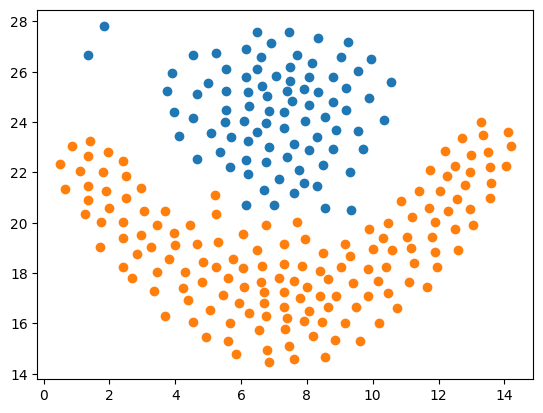

In [3]:
import matplotlib.pyplot as plt

plt.scatter([flame[0].iloc[i] for i in range(len(flame)) if flame[2].iloc[i] == 1], [flame[1].iloc[i] for i in range(len(flame)) if flame[2].iloc[i] == 1])
plt.scatter([flame[0].iloc[i] for i in range(len(flame)) if flame[2].iloc[i] == 2], [flame[1].iloc[i] for i in range(len(flame)) if flame[2].iloc[i] == 2])

plt.show()

# Thyroid

In [4]:
thyroid = pd.read_csv('./Datasets/thyroid.data', delimiter=",", header=None, engine='python')
thyroid

,0,1,2,3,4,5
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1
...,...,...,...,...,...,...
210,3,118,6.5,1.3,1.7,11.5
211,3,139,4.2,0.7,4.3,6.3
212,3,103,5.1,1.4,1.2,5.0
213,3,97,4.7,1.1,2.1,12.6


# Spiral

In [5]:
spiral = pd.read_csv('./Datasets/spiral.txt', delimiter="\t", header=None)
spiral

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


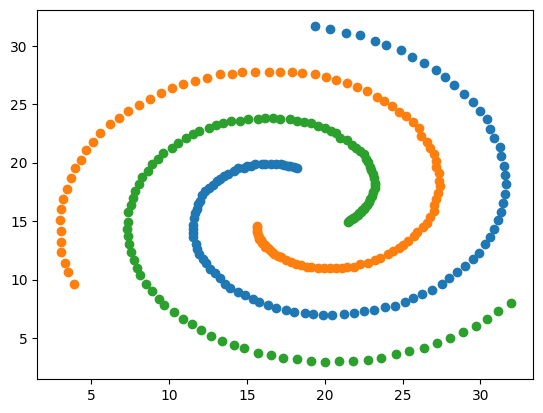

In [6]:
import matplotlib.pyplot as plt

plt.scatter([spiral[0].iloc[i] for i in range(len(spiral)) if spiral[2].iloc[i] == 1], [spiral[1].iloc[i] for i in range(len(spiral)) if spiral[2].iloc[i] == 1])
plt.scatter([spiral[0].iloc[i] for i in range(len(spiral)) if spiral[2].iloc[i] == 2], [spiral[1].iloc[i] for i in range(len(spiral)) if spiral[2].iloc[i] == 2])
plt.scatter([spiral[0].iloc[i] for i in range(len(spiral)) if spiral[2].iloc[i] == 3], [spiral[1].iloc[i] for i in range(len(spiral)) if spiral[2].iloc[i] == 3])

plt.show()

# Banana

In [7]:
mat = scipy.io.loadmat('./Datasets/banana.mat')
banana_X = mat['data']
banana_Y = mat['label']

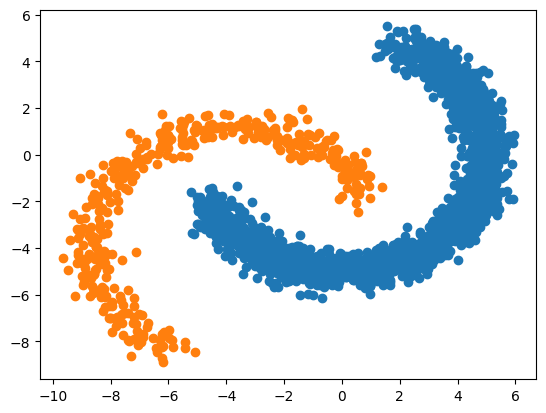

In [8]:
import matplotlib.pylab as plt
import numpy as np

plt.scatter(banana_X[:, 0][np.where(banana_Y == 1)[0]], banana_X[:, 1][np.where(banana_Y == 1)[0]])
plt.scatter(banana_X[:, 0][np.where(banana_Y == 2)[0]], banana_X[:, 1][np.where(banana_Y == 2)[0]])
plt.show()

# Gaussian

In [9]:
mat = scipy.io.loadmat('./Datasets/gaussian.mat')
gaussian_X = mat['data']
gaussian_Y = mat['label']

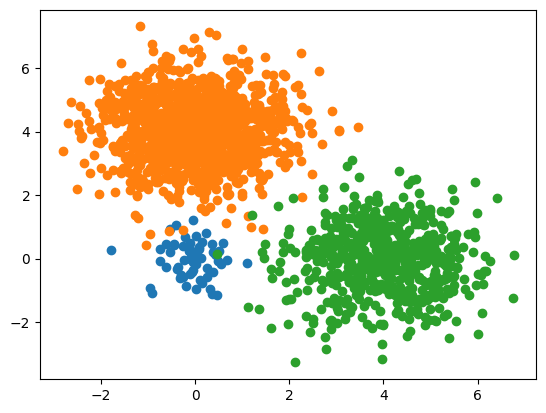

In [10]:
import matplotlib.pylab as plt
import numpy as np

plt.scatter(gaussian_X[:, 0][np.where(gaussian_Y == 1)[0]], gaussian_X[:, 1][np.where(gaussian_Y == 1)[0]])
plt.scatter(gaussian_X[:, 0][np.where(gaussian_Y == 2)[0]], gaussian_X[:, 1][np.where(gaussian_Y == 2)[0]])
plt.scatter(gaussian_X[:, 0][np.where(gaussian_Y == 3)[0]], gaussian_X[:, 1][np.where(gaussian_Y == 3)[0]])
plt.show()

# Lithuanian

In [11]:
mat = scipy.io.loadmat('./Datasets/lithuanian.mat')
lithuanian_X = mat['data']
lithuanian_Y = mat['label']

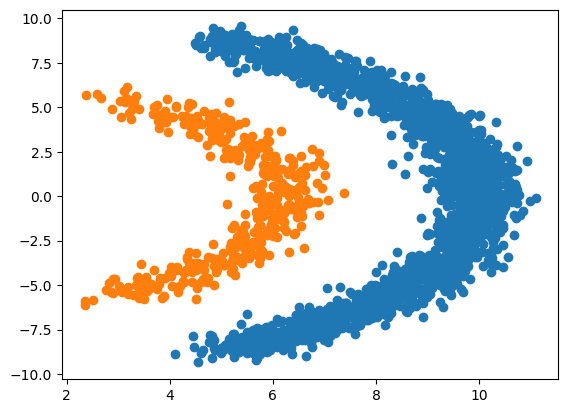

In [12]:
import matplotlib.pylab as plt
import numpy as np

plt.scatter(lithuanian_X[:, 0][np.where(lithuanian_Y == 1)[0]], lithuanian_X[:, 1][np.where(lithuanian_Y == 1)[0]])
plt.scatter(lithuanian_X[:, 0][np.where(lithuanian_Y == 2)[0]], lithuanian_X[:, 1][np.where(lithuanian_Y == 2)[0]])
plt.show()

# Robot Navigation

In [5]:
robot = pd.read_csv('./Datasets/robot_navigation_24.data', delimiter=",", header=None, engine='python')
robot

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


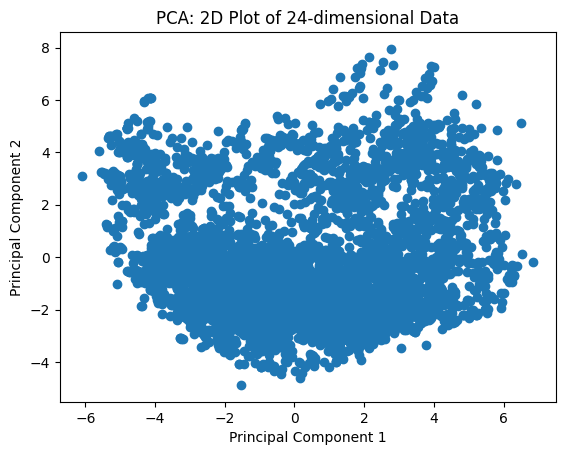

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example 24-dimensional data
data = robot.iloc[:, 0:24]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Plot of 24-dimensional Data')
plt.show()


# Algorithms

In [15]:
p = None
sigma = None
C = None
ICC = None
Center = None
RNN = None
distances = None
dc = None

In [16]:
def calculate_Eq2(dataset):
    global sigma

    sigma = np.zeros((len(dataset)))
    
    for i in range(len(dataset)):
        flag = True
        di = []
        for j in range(len(dataset)):
            if i != j and p[i] <= p[j]:
                flag = False
                if p[i] < p[j]:
                    di.append(distances[i, j])
        if flag:
            sigma[i] = max(distances[i])
        else:
            sigma[i] = min(di)

In [17]:
def calculate_Eq5(dataset):
    global p

    p = []
    for i in range(len(dataset)):
        s = 0
        for j in range(len(dataset)):
            if i != j:
                dist = distances[i, j]
                if dist <= dc:
                    s = s + math.exp((-1)*(math.pow(dist/dc, 2)))
        p.append(s)

    p = np.array(p)

In [116]:
def calculate_reverse_nearest_neighbors(dataset):
    global RNN

    radius = 0.1
    reverse_neighbors = []
    for i in range(len(dataset)):
        neighbors = np.where(distances[i] < radius)[0]
        reverse_neighbors.append(neighbors)

    RNN = [0] * len(dataset)
    for i, rn in enumerate(reverse_neighbors):
        RNN[i] = len(rn)

In [19]:
def assign_remaining_points(value):
    index = np.where(np.array(C) == value)[0]
    dens = [p[i] for i in index]
    sort_dens = sorted(range(len(dens)), key=lambda i: dens[i], reverse=True)
    for i in sort_dens:
        min_dist = float('inf')
        min_index = 0
        for j, point in Center:
            if distances[index[i], j] < min_dist and p[j] > dens[i]:
                min_dist = distances[index[i], j]
                min_index = j
        C[index[i]] = C[min_index]

In [110]:
def assign_remaining_points(value):
    index = np.where(np.array(C) == value)[0]
    dens = [p[i] for i in index]
    sort_dens = sorted(range(len(dens)), key=lambda i: dens[i], reverse=True)
    for i in sort_dens:
        min_dist = float('inf')
        min_index = 0
        for j, point in Center:
            if distances[index[i], j] < min_dist and p[j] > dens[i]:
                min_dist = distances[index[i], j]
                min_index = j
        C[index[i]] = C[min_index]

1

In [20]:
def initial_sub_cluster(dataset):
    # Input: Dataset S
    # Output: Points label C, the number of initial sub-clusters ICC.
    
    global C, ICC, Center
    
    calculate_Eq5(dataset) # calculate p

    calculate_Eq2(dataset) # calculate sigma

    ICC = 0
    C = [-1]*len(dataset)
    Center = []

    calculate_reverse_nearest_neighbors(dataset) # calculate RNN

    # determine the noise points;
    for i in range(len(dataset)):
        if (sigma[i] > (np.mean(sigma) + np.std(sigma))) and (RNN[i] < (np.mean(RNN) - np.std(RNN))) and (p[i] < (np.mean(p) - np.std(p))):
            C[i] = 0

    # determine the initial sub-cluster centers;
    for i in range(len(dataset)):
        if sigma[i] > (np.mean(sigma) + np.std(sigma)) and C[i] != 0:
            ICC = ICC + 1
            C[i] = ICC
            Center.append([i, dataset[i]])

    # Assign the remaining points to the initial sub-clusters;
    assign_remaining_points(-1)

2

In [61]:
def update_sub_cluster(dataset):
    # Input: Dataset S, Points label C, ICC.
    # Output: Points label C, the number of sub-clusters ICC.
    
    global ICC

    # Delete the false sub-cluster centers from the initial sub-cluster center set;
    for i in range(len(Center)-1, -1, -1):
        cluster_indices = np.where(np.array(C) == C[Center[i][0]])[0]
            
        kdtree = KDTree(dataset)
        nearest_indices = kdtree.query_ball_point(Center[i][1], dc)

        if len(cluster_indices) <= len(nearest_indices):
            for j in cluster_indices:
                C[j] = -1
            ICC = ICC -1
            del Center[i]

    # Assign the points in the false sub-clusters to the sub-clusters;
    assign_remaining_points(-1)

3

In [22]:
def denote_noise_points():
    noise_points = [1]*len(C)
    for i in range(len(C)):
        if C[i] == 0:
            noise_points[i] = 0

    return noise_points

In [23]:
def calculate_Eq6(dataset):
    No = denote_noise_points()
    if No.count(0) == 0:
        return dc
    
    data = [d for j, d in enumerate(dataset) if No[j] != 0]
    nn = NearestNeighbors(n_neighbors=2).fit(data)
    d, i = nn.kneighbors(data)

    return max([
        max(d[i])
        for i in range(len(d))
    ])

In [24]:
def find_boundary_points(X):
    # Find the average density of points in X
    average_density = np.mean(p[X])

    # Find the boundary points of X
    boundary_points = []
    for index in X:
        if p[index] < average_density:
            boundary_points.append(index)

    return boundary_points

def In(X):
    # Find the boundary points of X
    boundary_points = find_boundary_points(X)

    # Exclude the boundary points from X
    In_X = [index for index in X if index not in boundary_points]

    return In_X

In [98]:
def merge_sub_cluster(dataset):
    # Input: Dataset S, ICC.
    # Output: Final clusters C.
    
    global C
    
    r = calculate_Eq6(dataset)

    # Get the inner points set In(S);
    merge_c = []
    for m in range(ICC-1):
        Cm = [a for a, x in enumerate(C) if x == C[Center[m][0]]]
        for n in range(m+1, ICC):
            Cn = [b for b, x in enumerate(C) if x == C[Center[n][0]]]
            mini = float('inf')
            for a in Cm:
                for b in Cn:
                    if distances[a, b] < mini:
                        mini = distances[a, b]
                        i = a
                        j = b
                        
            if mini < r:
                if (i in In(Cm) and j in In(Cn)) or (p[i] + p[j] > (np.mean(p[[Center[m][0], Center[n][0]]]))):
                    merge_c.append([C[Center[m][0]], C[Center[n][0]]])
                    # for i in Cn:
                    #    C[i] = C[Cm[0]]

    # Merge the corresponding clusters into one
    cluster_dict = {}
    unique_clusters = set(C)
    
    for cluster in unique_clusters:
        cluster_dict[cluster] = cluster
    
    if len(merge_c) > 0:
        for merge in merge_c:
            new_cluster = merge[1]
            while cluster_dict[merge[1]] != new_cluster:
                new_cluster = cluster_dict[merge[1]]
    
            target_cluster = cluster_dict[merge[0]]
            for key, value in cluster_dict.items():
                if value == target_cluster:
                    cluster_dict[key] = new_cluster
    
        C = [cluster_dict[cluster] if cluster != 0 else 0 for cluster in C]

    # Assign the noise points to the clusters;
    assign_remaining_points(0)

4

In [26]:
def draw_plot(dataset, title):
    plt.title(title)

    for i in set(C):
        plt.scatter(dataset[:, 0][np.array(C)==i], dataset[:, 1][np.array(C)==i], label=f"Label: {i}")

    for i, point in Center:
        plt.plot(point[0], point[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="black")

    plt.legend()
    plt.show()

In [27]:
def framework(dataset):
    global distances, dc

    distances = distance.cdist(dataset, dataset, metric='euclidean')

    nn = NearestNeighbors(n_neighbors=2).fit(dataset)
    d, i = nn.kneighbors(dataset)
    dc = max([
        max(d[i])
        for i in range(len(d))
    ])
            
    initial_sub_cluster(dataset)
    draw_plot(dataset, "After Initial")
    update_sub_cluster(dataset)
    draw_plot(dataset, "After Update")
    merge_sub_cluster(dataset)
    draw_plot(dataset, "After Merge")

# Plots and Evaluation

In [28]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate(dataset, true_labels):
    framework(np.array(dataset))
    print(f"Number of centers: {len(Center)}")
    print(f"Labels: {set(C)}")
    print(f"dc: {dc}")
    print(f"Number of noise points: {C.count(0)}")

    true_labels = np.array(true_labels).reshape(len(true_labels), )

    predicted_labels = np.array(C.copy())
    for i, point in Center:
        index = np.where(np.array(C) == C[i])[0]
        label = [true_labels[j] for j in index]
        m = 0
        for j, v in enumerate(set(label)):
            if label.count(v) > m:
                m = label.count(v)
                l = v
        predicted_labels[index] = l

    accuracy = accuracy_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    nmi = normalized_mutual_info_score(true_labels, C)
    rand = adjusted_rand_score(true_labels, C)

    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("NMI: ", nmi)
    print("Adjusted Rand: ", rand)

********************************************Gaussian********************************************


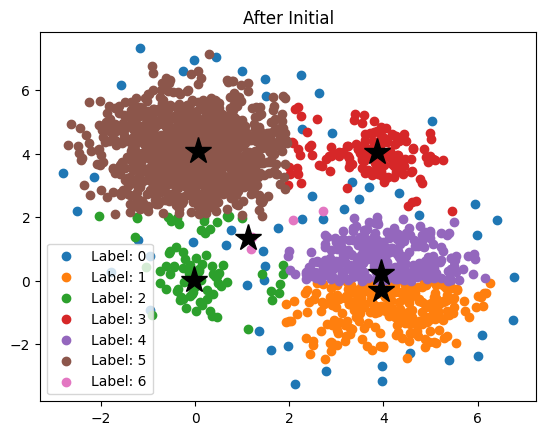

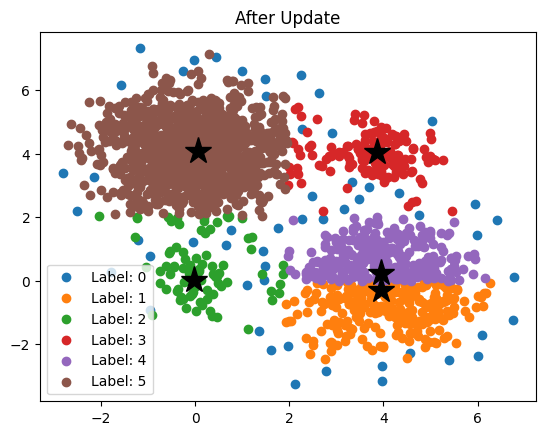

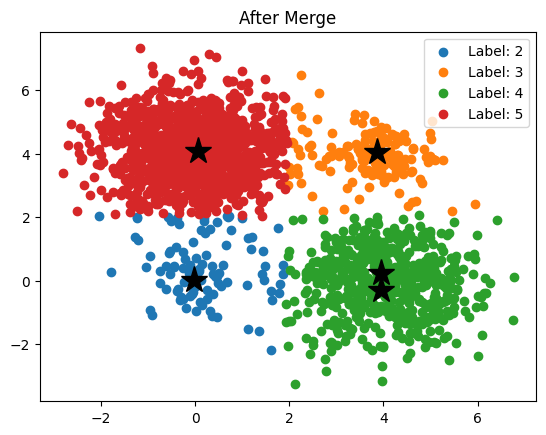

Number of centers: 5
Labels: {2, 3, 4, 5}
dc: 0.7893433014146032
Number of noise points: 0
Accuracy:  0.9595
Recall:  0.9595
NMI:  0.8464480932449729
Adjusted Rand:  0.9109648449531553
********************************************Flame***********************************************


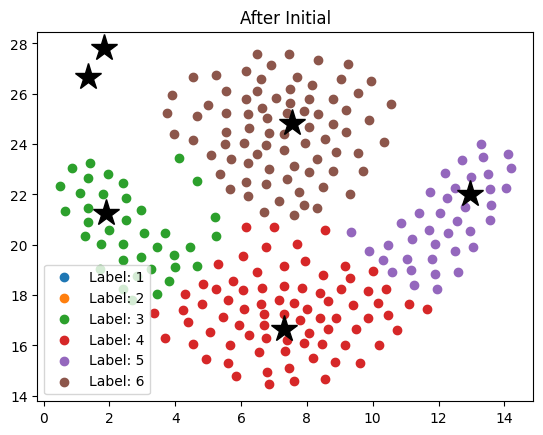

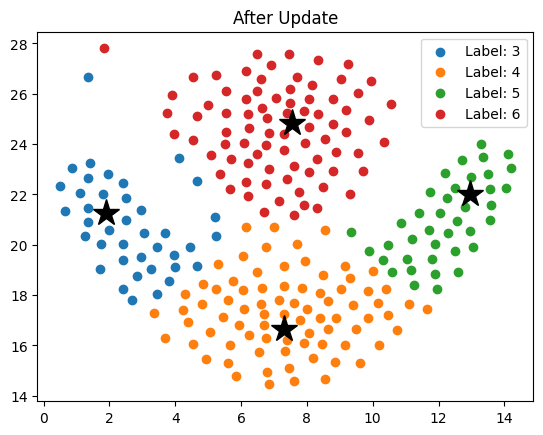

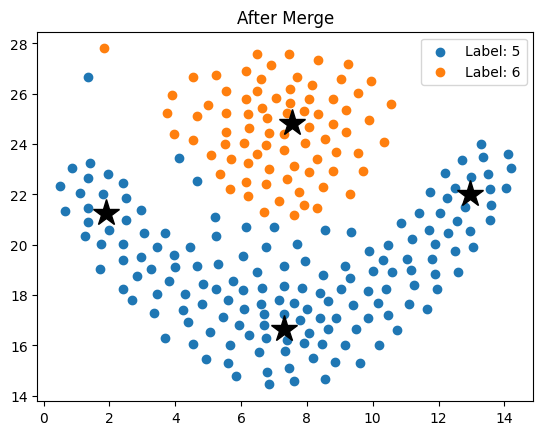

Number of centers: 4
Labels: {5, 6}
dc: 1.2539936203984472
Number of noise points: 0
Accuracy:  0.9708333333333333
Recall:  0.9708333333333333
NMI:  0.8286688191611283
Adjusted Rand:  0.8853789156766443
********************************************Banana**********************************************


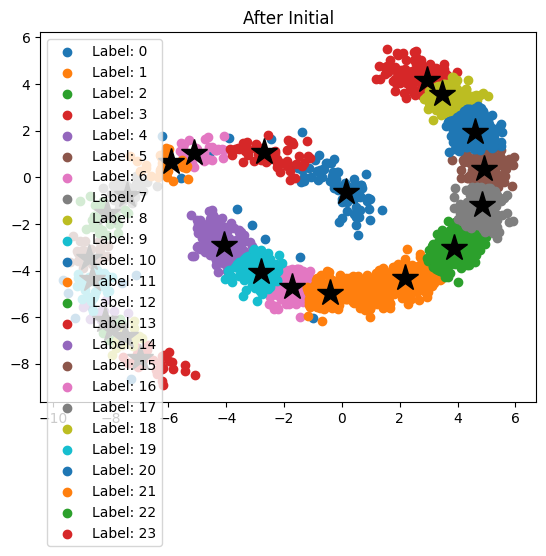

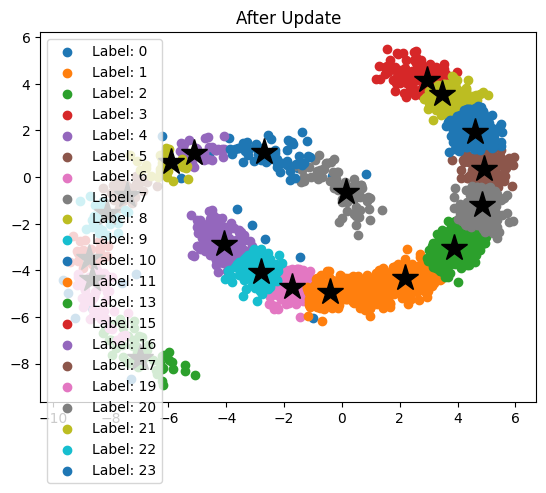

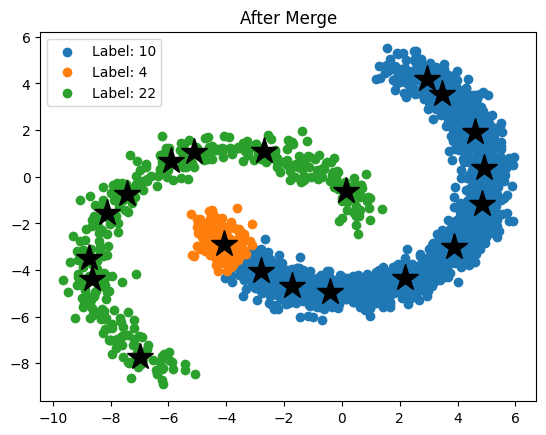

Number of centers: 20
Labels: {10, 4, 22}
dc: 0.6265655932360517
Number of noise points: 0
Accuracy:  1.0
Recall:  1.0
NMI:  0.7820396850748883
Adjusted Rand:  0.7492942196299821
********************************************Lithuanian******************************************


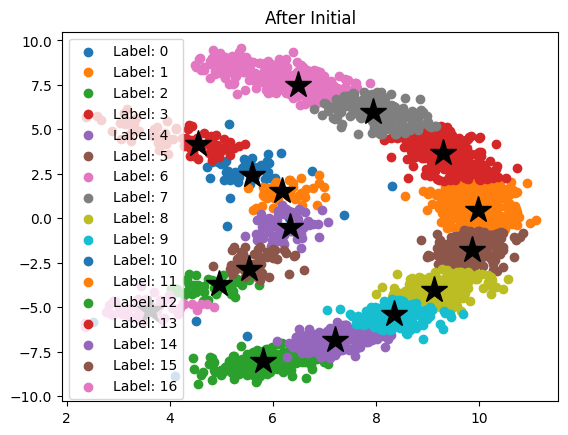

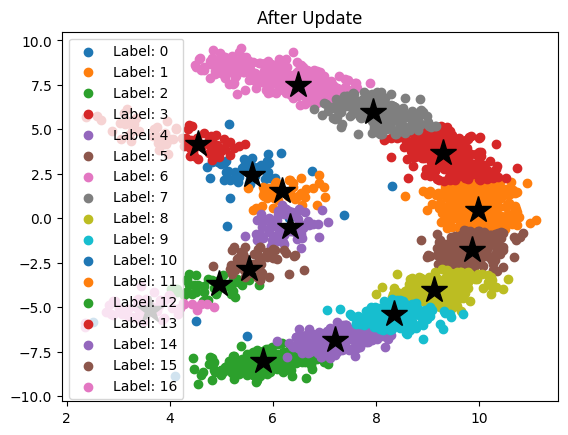

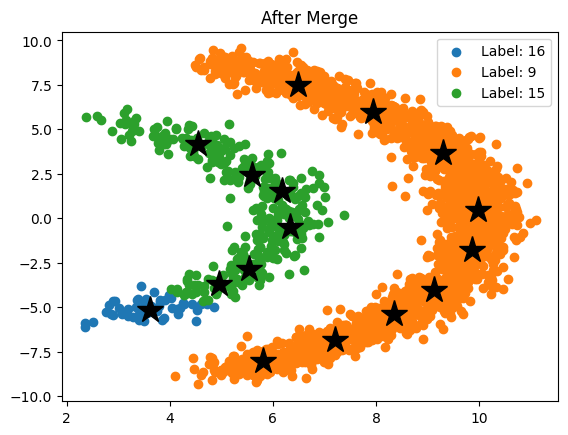

Number of centers: 16
Labels: {16, 9, 15}
dc: 0.6694331387046091
Number of noise points: 0
Accuracy:  1.0
Recall:  1.0
NMI:  0.9295974774668458
Adjusted Rand:  0.9832044032812799
************************************************************************************************


In [117]:
print("********************************************Gaussian********************************************")
calculate(gaussian_X, gaussian_Y)
print("********************************************Flame***********************************************")
calculate(flame[[0, 1]], flame[2])
print("********************************************Banana**********************************************")
calculate(banana_X, banana_Y)
print("********************************************Lithuanian******************************************")
calculate(lithuanian_X, lithuanian_Y)
print("************************************************************************************************")

********************************************Thyroid******************************************


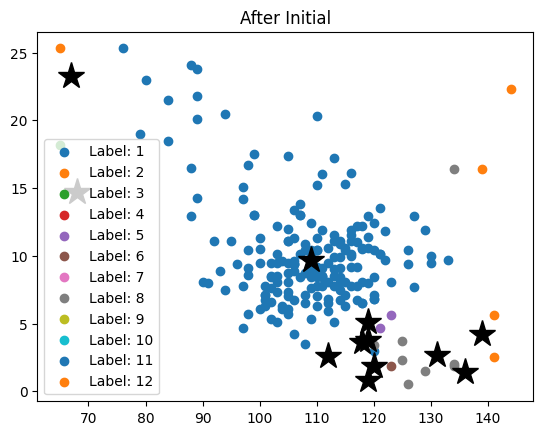

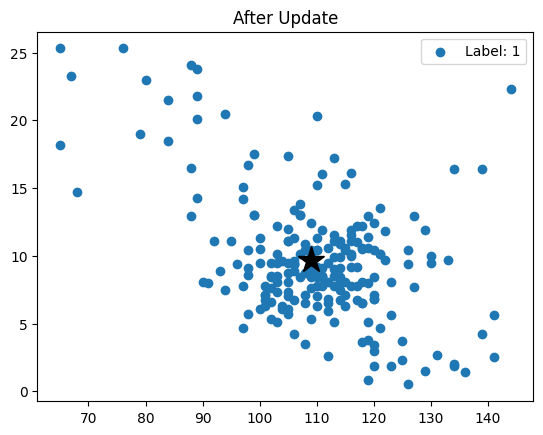

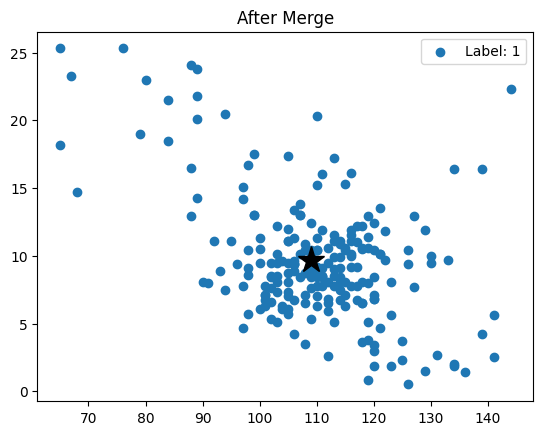

Number of centers: 1
Labels: {1}
dc: 17.209299811439163
Number of noise points: 0
Accuracy:  0.6976744186046512
Recall:  0.6976744186046512
NMI:  0.0
Adjusted Rand:  0.0


In [69]:
print("********************************************Thyroid******************************************")
calculate(thyroid.iloc[:, 1:6], thyroid.iloc[:, 0])

********************************************Spiral******************************************


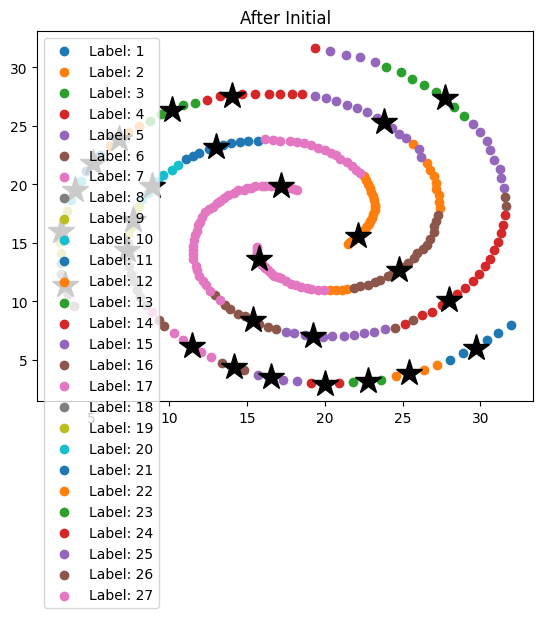

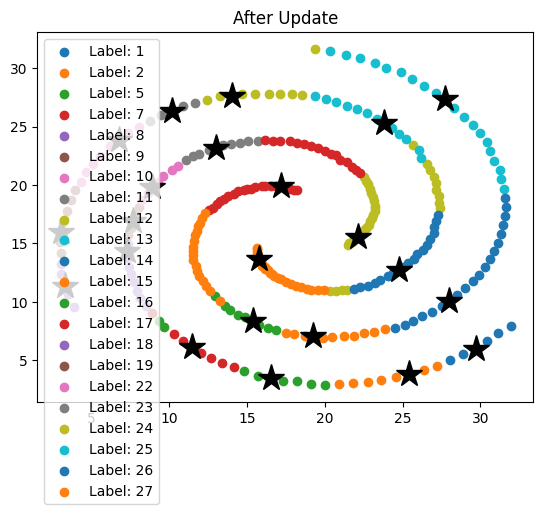

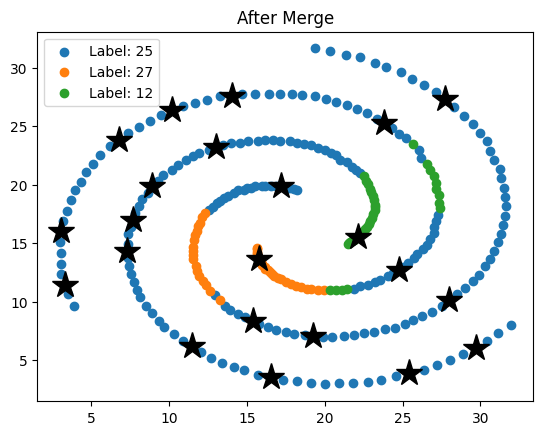

Number of centers: 22
Labels: {25, 27, 12}
dc: 1.1067971810589334
Number of noise points: 0
Accuracy:  0.4391025641025641
Recall:  0.4391025641025641
NMI:  0.13336664411921745
Adjusted Rand:  0.031655484414333065


In [85]:
print("********************************************Spiral******************************************")
calculate(spiral.iloc[:, 0:2], spiral.iloc[:, 2])

********************************************Robot******************************************


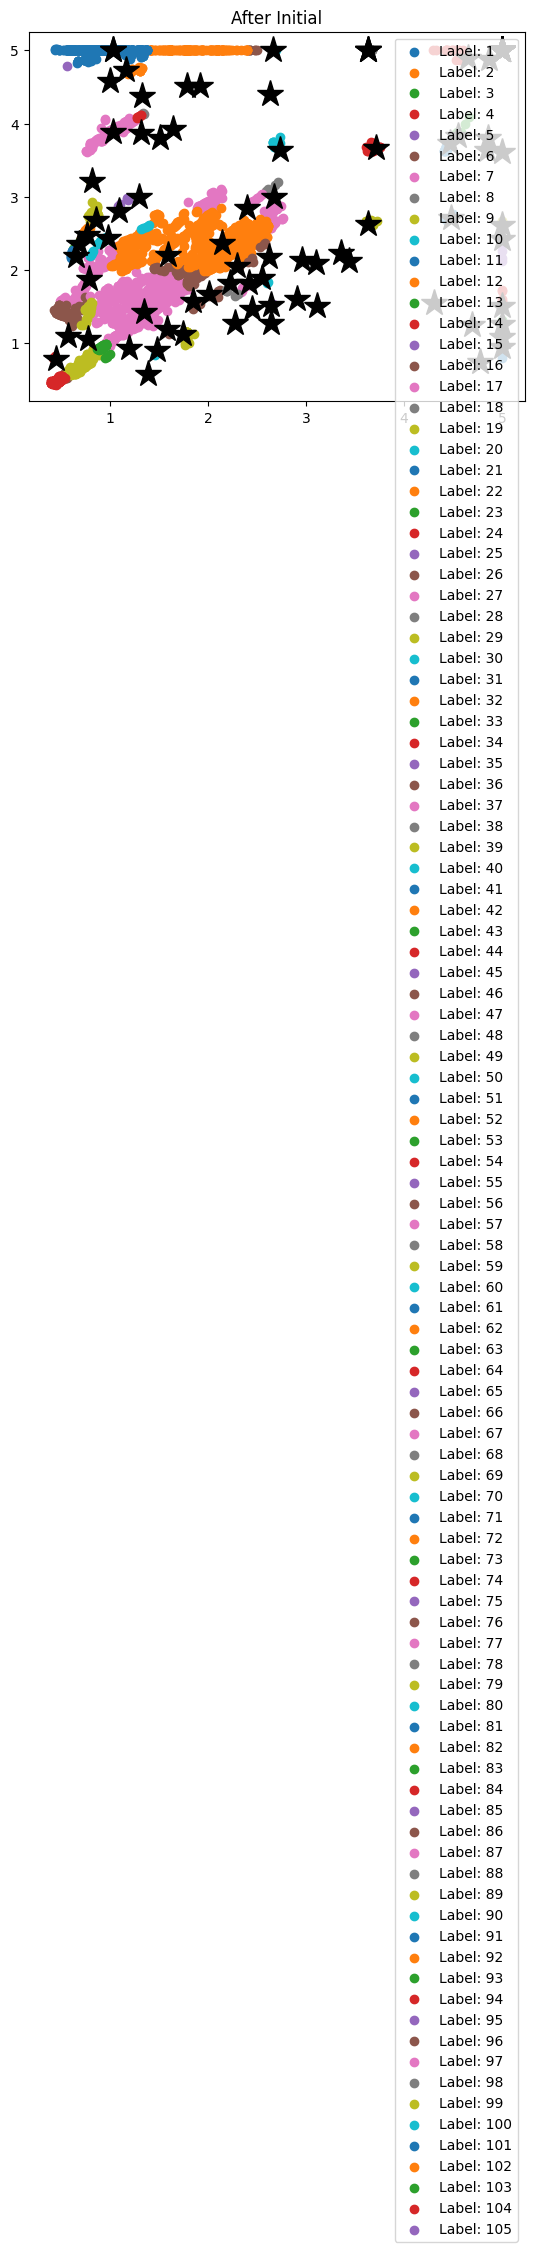

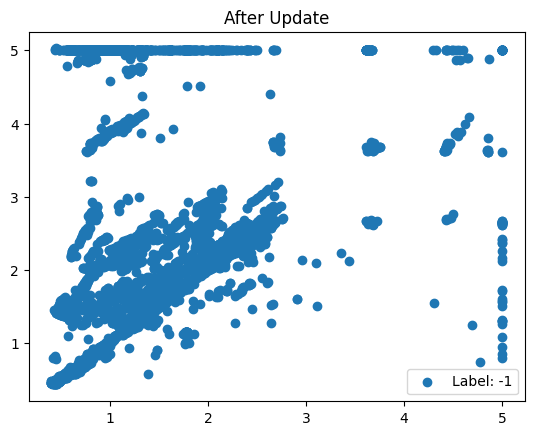

[]


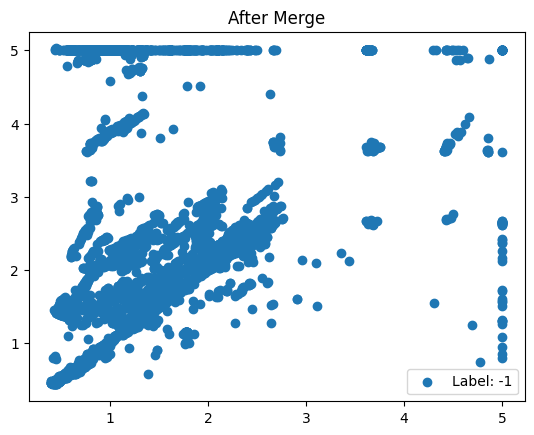

Number of centers: 0
Labels: {-1}
dc: 0.5920354719102566
Number of noise points: 0


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [32]:
print("********************************************Robot******************************************")
calculate(robot.iloc[:, 0:2], robot.iloc[:, 2])